# Trabalho Laboratório de Pesquisa 1: Dataset Titanic

Obs:
- adicionar gráficos e comentários (se necessário)
- Falta a parte de Explorar o conjunto de dados para obter maior compreensão (EDA)

## 1. Componentes

Integrantes do grupo: <br>
Helen França Medeiros: helenfranca93@gmail.com <br>
Mayke Willans Christo Pereira: maykewillans@hotmail.com <br>
Lia Casati: 

## 2. Apresentação do Dataset

### Visão Geral

#### Descrição da base

O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Assim, o dataset Titanic possui informações (nome, idade, sexo, classe socioeconômica, etc.) sobre os passageiros presentes no na embarcação. Será que, com base nesses dados, é possível prever que tipo de pessoa tem mais probabilidade de sobreviver?

#### Objetivo

O intuito desta atividade é fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.

### Análise do Dataset

#### Carregar Bibliotecas

In [1]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy as np
import pandas as pd
import sys
import seaborn as sns
 
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt

#### Carregar Dataset

In [3]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_dados_t.csv"
names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
dataset = pd.read_csv(url, header=0, names=names)

#### Exibindo número de linhas e de colunas

In [4]:
print(dataset.shape)

(891, 12)


#### Significado dos dados

- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre 
    - 0 = Não
    - 1 = Sim
- **Pclass**: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Quantidade de cônjuges e irmãos a bordo
- **Parch**: Quantidade de pais e filhos a bordo
- **Ticket**: Número da passagem
- **Fare**: Preço da Passagem
- **Cabin**: Número da cabine do passageiro
- **Embarked**: Porto no qual o passageiro embarcou
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

Atributo alvo: **Survived**

#### Exibindo primeiros elementos

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observando os dados, temos que os tipos dos atributos são:
- Numérico:
    - 4 variáveis discretas: passengerid, pclass, sibSp e parch
    - 2 variáveis contínuas: fare e age
- Categórico:
    - 1 binário: survived
    - 5 variáveis nominais: name, sex, ticket, cabin, embarked.

#### Exibindo dados estatísticos

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Podemos notar que na coluna fare a média é 31,64 sendo que a mediana esta em 14,45. Isso significa que temos valores discrepantes distorcendo a distribuição dos valores desta variável. Além disso, outro ponto importante de observar é que a coluna Age possui valores faltantes.

#### Exibindo informações sobre o tipo dos dados

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Além dos dados faltantes na coluna Age, temos valores nulos em Cabin e Embarked.

#### Verificando dados nulos

In [8]:
dataset_T = dataset.describe(include="all").T
dataset_T['nulos'] = pd.DataFrame(dataset.isnull().sum())
dataset_T['prct_nulo'] = pd.DataFrame(dataset.isna().mean().round(4) * 100)
dataset_T["type"] = pd.Series(dataset.dtypes)
dataset_T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulos,prct_nulo,type
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891,0,0.00,int64
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1,0,0.00,int64
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3,0,0.00,int64
Name,891,891,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80,177,19.87,float64
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8,0,0.00,int64
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6,0,0.00,int64
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329,0,0.00,float64


In [9]:
dataset.isnull().sum() / dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

As colunas Cabin e Embarked possuem, respectivamente, 77.10% e 0.22% de dados faltantes. Além dessas, há 19.87% de passageiros sem informações sobre a idade.

#### Verificando se há dados duplicados

In [10]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Não há dados duplicados

## 3. Pré-processamento do Dataset

#### Tratando a coluna Age

############# Fazer um gráfico desse trem aqui em baixo

Visando maior acerto na imputação dos dados, vamos nos apoiar na média de idade contando com duas variáveis: Sex e Title
<br>Title é a coluna criada com o pronome de tratamento extraído do nome do passageiro.

In [13]:
def extrairTitulo(df):
  df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())

extrairTitulo(dataset)

Dataset com a coluna Title

In [14]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


Verificando a média de idade por Title e Sex

In [16]:
age_by_title_sex = dataset.groupby(['Sex', 'Title']).mean()['Age']
print(age_by_title_sex)

Sex     Title       
female  dr              49.000000
        lady            48.000000
        miss            21.773973
        mlle            24.000000
        mme             24.000000
        mrs             35.898148
        ms              28.000000
        the countess    33.000000
male    capt            70.000000
        col             58.000000
        don             40.000000
        dr              40.600000
        jonkheer        38.000000
        major           48.500000
        master           4.574167
        mr              32.368090
        rev             43.166667
        sir             49.000000
Name: Age, dtype: float64


Podemos tratar os valores faltantes da coluna Age conforme as classes Title e Sex 

In [17]:
dataset['Age'] = dataset.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.mean()))

Dataset atualizado

In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.500000,446.0000,668.500000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.000000,0.0000,1.000000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.000000,3.0000,3.000000,3.0000
Age,891.0,29.753088,13.275811,0.42,21.773973,30.0000,35.898148,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.000000,0.0000,1.000000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.000000,0.0000,0.000000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.910400,14.4542,31.000000,512.3292


#### Tratando a coluna Cabin

In [19]:
dataset.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

Os dados da coluna Cabin são conjuntos de letras e números.

In [20]:
dataset['Cabin'] = dataset['Cabin'].str[0].str.upper().str.strip()
dataset.groupby('Pclass')['Cabin'].value_counts()

Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Cabin, dtype: int64

Separando as cabines por classe, temos:
- Classe 1 - A, B, C, D, E, T
- Classe 2 - D, E, F
- Classe 3 - E, G, F

Vamos identificar com a letra N as linhas que possuem valores nulos e verificar a distribuição dos dados

In [21]:
dataset['Cabin'] = dataset['Cabin'].fillna('N')

In [22]:
dataset.groupby('Cabin').size()

Cabin
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
dtype: int64

Atualizando o dataset

In [23]:
dataset.isnull().sum() / dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.002245
Title          0.000000
dtype: float64

Por fim, vamos aplicar a técnica One-Hot Encoding na coluna Cabin

In [24]:
cabin_dummies = pd.get_dummies(dataset['Cabin'], prefix='Cabin')
dataset = pd.concat([dataset, cabin_dummies], axis=1)
dataset.drop('Cabin', axis=1, inplace=True)

Como so temos um registro na cabine T, vamos desconsiderá-la do dataset

In [25]:
dataset.drop('Cabin_T', axis=1, inplace=True)

#### Tratando a coluna Sex

In [26]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

#### Tratando a coluna Embarked

In [27]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

Aqui também vamos aplicar a técnica One-Hot Encoding

In [28]:
embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, embarked_dummies], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)

Dataset atualizado

In [29]:
display(dataset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,mr,0,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,mrs,0,0,1,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,miss,0,0,0,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,mrs,0,0,1,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,mr,0,0,0,0,0,0,0,1,0,0,1


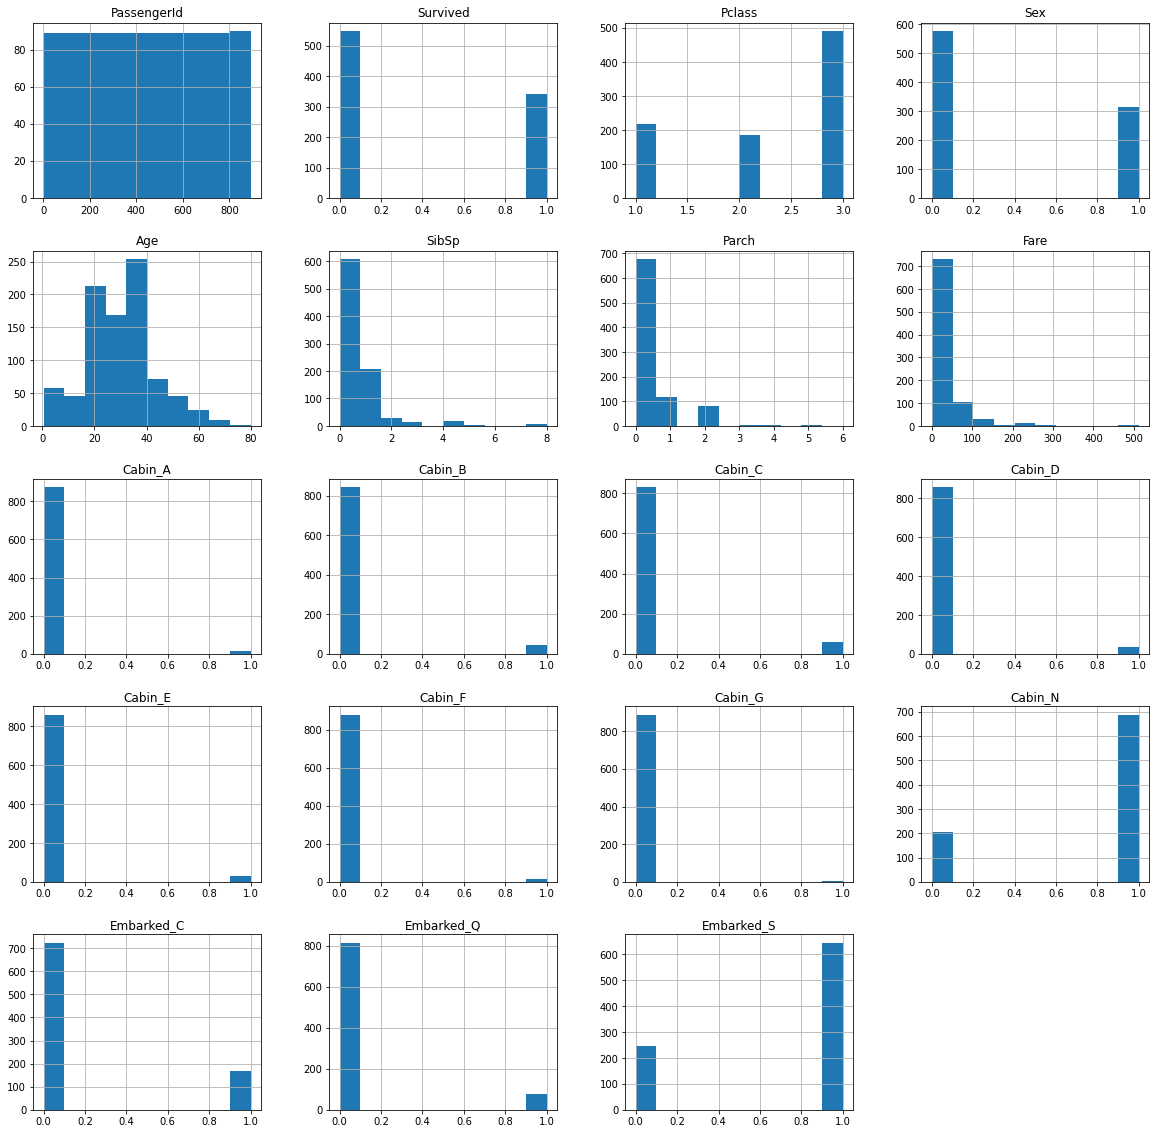

In [30]:
dataset.hist(figsize=(20,20))
plt.show()

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Title        891 non-null    object 
 11  Cabin_A      891 non-null    uint8  
 12  Cabin_B      891 non-null    uint8  
 13  Cabin_C      891 non-null    uint8  
 14  Cabin_D      891 non-null    uint8  
 15  Cabin_E      891 non-null    uint8  
 16  Cabin_F      891 non-null    uint8  
 17  Cabin_G      891 non-null    uint8  
 18  Cabin_N      891 non-null    uint8  
 19  Embarked

#### Removendo colunas categoricas

In [32]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)

#### Dataset final

In [33]:
display(dataset.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,mr,0,0,0,0,0,0,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,mrs,0,0,1,0,0,0,0,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,miss,0,0,0,0,0,0,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,mrs,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,mr,0,0,0,0,0,0,0,1,0,0,1


### Análise gráfica

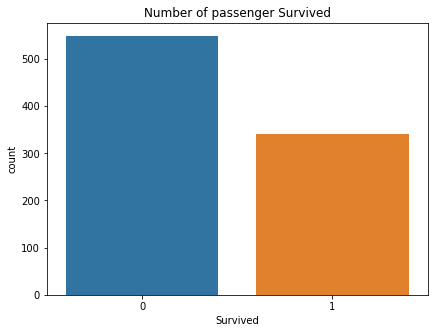

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="Survived", data=dataset)
plt.title('Number of passenger Survived');

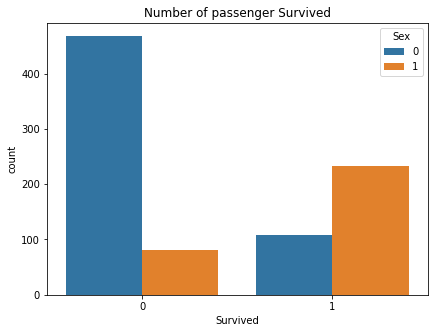

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=dataset)
plt.title('Number of passenger Survived');

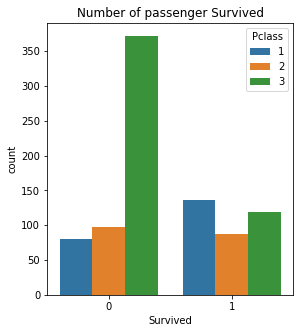

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
sns.countplot(x="Survived", hue="Pclass", data=dataset)
plt.title('Number of passenger Survived');

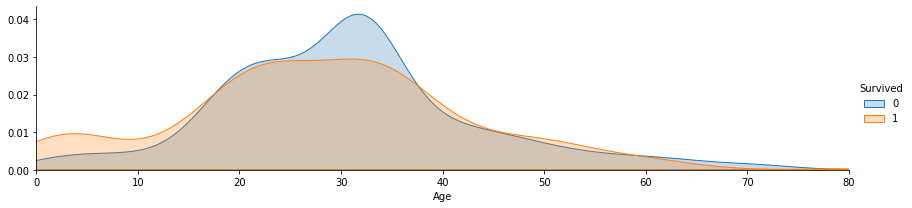

In [37]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( dataset, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , dataset['Age'].max()))
a.add_legend()

## 4. Análise Exploratória do Dataset

## 0. Testando predição

Sessão em fase de desenvolvimento

In [ ]:
array = dataset.values
X = array[:,1:]
y = array[:,:1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions_train = model.predict(X_train)
predictions_validation = model.predict(X_validation)
print(sklearn.metrics.accuracy_score(Y_train, predictions_train))
print(sklearn.metrics.accuracy_score(Y_validation, predictions_validation))

0.8188622754491018
0.8026905829596412


c:\estudo\disciplinaslab\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\estudo\disciplinaslab\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
